# Guided Capstone Step 4. Pre-Processing and Training Data Development

**The Data Science Method**  


1.   Problem Identification 


2.   Data Wrangling 
  
 
3.   Exploratory Data Analysis   

4.   **Pre-processing and Training Data Development**  
 * Create dummy or indicator features for categorical variables
  * Standardize the magnitude of numeric features
  * Split into testing and training datasets
  * Apply scaler to the testing set
5.   Modeling 
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

**<font color='teal'> Start by loading the necessary packages as we did in step 3 and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [604]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [605]:
pwd

'/Users/Monika/Projects'

**<font color='teal'>  Load the csv file you created in step 3, remember it should be saved inside your data subfolder and print the first five rows.</font>**

In [606]:
df = pd.read_csv('step3_output.csv', index_col=0)
print(df.head())

                            Name       state  summit_elev  vertical_drop  \
1            Eaglecrest Ski Area      Alaska         2600           1540   
2               Hilltop Ski Area      Alaska         2090            294   
4            Sunrise Park Resort     Arizona        11100           1800   
5  Yosemite Ski & Snowboard Area  California         7800            600   
8         Boreal Mountain Resort  California         7700            500   

   trams  fastEight  fastSixes  fastQuads  quad  triple  ...  Runs  \
1      0        0.0          0          0     0       0  ...  36.0   
2      0        0.0          0          0     0       1  ...  13.0   
4      0        0.0          0          1     2       3  ...  65.0   
5      0        0.0          0          0     0       1  ...  10.0   
8      0        0.0          0          1     1       3  ...  33.0   

   LongestRun_mi  SkiableTerrain_ac  daysOpenLastYear  yearsOpen  \
1            2.0              640.0              45.0 

## Create dummy features for categorical variables

**<font color='teal'> Create dummy variables for `state`. Add the dummies back to the dataframe and remove the original column for `state`. </font>**

Hint: you can see an example of how to execute this in Aiden's article on preprocessing [here](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-pre-processing-and-training-data-development-fd2d75182967). 

In [607]:
df.drop(columns=['Name'], inplace=True)
dfo = df.select_dtypes(include=['object']) 
df2 = pd.concat([df.drop(dfo, axis=1), pd.get_dummies(dfo)], axis=1)

In [608]:
#dfo = pd.get_dummies(df, columns=['state'])
#df = df.drop(['state'], axis=1)
#new_frame = pd.concat([df, dfo], axis=1)

In [609]:
dfo

,state
1,Alaska
2,Alaska
4,Arizona
5,California
8,California
...,...
323,Wyoming
326,Wyoming
327,Wyoming
328,Wyoming


## Standardize the magnitude of numeric features

**<font color='teal'> Using sklearn preprocessing standardize the scale of the features of the dataframe except the name of the resort which we done't need in the dataframe for modeling, so it can be droppped here as well. Also, we want to hold out our response variable(s) so we can have their true values available for model performance review. Let's set `AdultWeekend` to the y variable as our response for scaling and modeling. Later we will go back and consider the `AdultWeekday`, `dayOpenLastYear`, and `projectedDaysOpen`. For now leave them in the development dataframe. </font>**

In [610]:
# first we import the preprocessing package from the sklearn library
from sklearn import preprocessing

# Declare an explanatory variable, called X,and assign it the result of dropping 'Name' and 'AdultWeekend' from the df
#X = df.drop(['Name','AdultWeekend'], axis=1)
X = df2.drop(columns = ['AdultWeekend'])
df2.head()

# Declare a response variable, called y, and assign it the AdultWeekend column of the df 
y = df2.AdultWeekend

# Here we use the StandardScaler() method of the preprocessing package, and then call the fit() method with parameter X 
scaler = preprocessing.StandardScaler().fit(X)

# Declare a variable called X_scaled, and assign it the result of calling the transform() method with parameter X 
X_scaled=scaler.transform(X) 

## Split into training and testing datasets

**<font color='teal'> Using sklearn model selection import train_test_split, and create a 75/25 split with the y = `AdultWeekend`. We will start by using the adult weekend ticket price as our response variable for modeling.</font>**

In [611]:
from sklearn import preprocessing
import statsmodels.formula.api as smf
results=smf.ols('y ~ X', data=df2).fit()
results.params

Intercept    1.968407e+01
X[0]         4.791577e-04
X[1]         3.498910e-03
X[2]        -4.015469e-12
X[3]         1.026183e-11
X[4]         8.535756e-13
X[5]         4.263540e-01
X[6]         1.039198e+00
X[7]         1.067683e+00
X[8]         9.380396e-02
X[9]        -1.418933e+00
X[10]        1.208107e+00
X[11]        1.071784e-02
X[12]        6.550109e-02
X[13]       -2.633341e-03
X[14]        5.901652e-02
X[15]        5.775032e-03
X[16]        8.169923e-03
X[17]        5.592986e-01
X[18]       -6.312192e-02
X[19]       -1.405322e+00
X[20]       -4.415048e+00
X[21]       -7.352828e+00
X[22]       -3.294473e+00
X[23]       -3.298671e-01
X[24]        5.329453e+00
X[25]       -8.974009e+00
X[26]       -1.770766e+00
X[27]       -7.104539e+00
X[28]       -8.599062e-01
X[29]        5.989495e+00
X[30]        6.793383e+00
X[31]        1.013253e+01
X[32]       -2.253875e+00
X[33]       -2.365475e+00
X[34]       -9.605161e-01
X[35]       -7.646406e+00
X[36]       -1.645229e+00
X[37]       

In [612]:
df2.columns

Index(['summit_elev', 'vertical_drop', 'trams', 'fastEight', 'fastSixes',
       'fastQuads', 'quad', 'triple', 'double', 'surface', 'total_chairs',
       'Runs', 'LongestRun_mi', 'SkiableTerrain_ac', 'daysOpenLastYear',
       'yearsOpen', 'averageSnowfall', 'AdultWeekday', 'AdultWeekend',
       'projectedDaysOpen', 'clusters', 'state_Alaska', 'state_Arizona',
       'state_California', 'state_Colorado', 'state_Connecticut',
       'state_Idaho', 'state_Illinois', 'state_Indiana', 'state_Iowa',
       'state_Maine', 'state_Maryland', 'state_Massachusetts',
       'state_Michigan', 'state_Minnesota', 'state_Missouri', 'state_Montana',
       'state_Nevada', 'state_New Hampshire', 'state_New Jersey',
       'state_New Mexico', 'state_New York', 'state_North Carolina',
       'state_Ohio', 'state_Oregon', 'state_Pennsylvania',
       'state_Rhode Island', 'state_South Dakota', 'state_Tennessee',
       'state_Utah', 'state_Vermont', 'state_Virginia', 'state_Washington',
       'state_W

In [613]:
scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
print(scaler.fit(X))
X_scaled=scaler.transform(X)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [614]:
# Import the train_test_split function from the sklearn.model_selection utility.  
from sklearn.model_selection import train_test_split

# Get the 1-dimensional flattened array of our response variable y by calling the ravel() function on y
y = y.ravel()

# Call the train_test_split() function with the first two parameters set to X_scaled and y 
# Declare four variables, X_train, X_test, y_train and y_test separated by commas 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)


    Here we start the actual modeling work. First let's fit a multiple linear regression model to predict the `AdultWeekend` price.

# Guided Capstone Step 5. Modeling


This is the fifth step in the Data Science Method. In the previous steps you cleaned and prepared the datasets. Now it's time to get into the most exciting part: modeling! In this exercise, you'll build three different models and compare each model's performance. In the end, you'll choose the best model for demonstrating insights to Big Mountain management.



### **The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.   **Modeling**
  * Fit Models with Training Data Set
  * Review Model Outcomes — Iterate over additional models as needed.
  * Identify the Final Model

6.   Documentation
  * Review the Results
  * Present and share your findings - storytelling
  * Finalize Code 
  * Finalize Documentation

## Fit Models with a Training Dataset

**<font color='teal'> Using sklearn, fit the model on your training dataset.</font>**

#### Model 1

In [615]:
X.head()

,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,...,state_Rhode Island,state_South Dakota,state_Tennessee,state_Utah,state_Vermont,state_Virginia,state_Washington,state_West Virginia,state_Wisconsin,state_Wyoming
1,2600,1540,0,0.0,0,0,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
2,2090,294,0,0.0,0,0,0,1,0,2,...,0,0,0,0,0,0,0,0,0,0
4,11100,1800,0,0.0,0,1,2,3,1,0,...,0,0,0,0,0,0,0,0,0,0
5,7800,600,0,0.0,0,0,0,1,3,1,...,0,0,0,0,0,0,0,0,0,0
8,7700,500,0,0.0,0,1,1,3,1,2,...,0,0,0,0,0,0,0,0,0,0


In [616]:
X.columns

Index(['summit_elev', 'vertical_drop', 'trams', 'fastEight', 'fastSixes',
       'fastQuads', 'quad', 'triple', 'double', 'surface', 'total_chairs',
       'Runs', 'LongestRun_mi', 'SkiableTerrain_ac', 'daysOpenLastYear',
       'yearsOpen', 'averageSnowfall', 'AdultWeekday', 'projectedDaysOpen',
       'clusters', 'state_Alaska', 'state_Arizona', 'state_California',
       'state_Colorado', 'state_Connecticut', 'state_Idaho', 'state_Illinois',
       'state_Indiana', 'state_Iowa', 'state_Maine', 'state_Maryland',
       'state_Massachusetts', 'state_Michigan', 'state_Minnesota',
       'state_Missouri', 'state_Montana', 'state_Nevada',
       'state_New Hampshire', 'state_New Jersey', 'state_New Mexico',
       'state_New York', 'state_North Carolina', 'state_Ohio', 'state_Oregon',
       'state_Pennsylvania', 'state_Rhode Island', 'state_South Dakota',
       'state_Tennessee', 'state_Utah', 'state_Vermont', 'state_Virginia',
       'state_Washington', 'state_West Virginia', 'state_W

In [617]:
#all first model set
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**<font color='teal'> Predict on the testing dataset and score the model performance with the y_test set and the y-pred values. The explained variance is a measure of the variation explained by the model. This is also known as the R-squared value. </font>**

Hint: you will have to use the `predict()` method here as it's used in this [DSM article](https://medium.com/@aiden.dataminer/the-data-science-method-dsm-modeling-56b4233cad1b) about modeling. 

In [618]:
type(X_test)

numpy.ndarray

In [619]:
# Make a variable called y_pred and assign it the result of calling predict() on our model variable with parameter X_test
y_pred = lm.predict(X_test)

## Review Model Outcomes — Iterate over additional models as needed

In [620]:
# You might want to use the explained_variance_score() and mean_absolute_error() metrics.
# To do so, you will need to import them from sklearn.metrics. 
# You can plug y_test and y_pred into the functions to evaluate the model

In [621]:
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

In [622]:
explained_variance_score(y_test, y_pred) 

0.6599286106346602

In [623]:
mean_absolute_error(y_test, y_pred)

6.740235184668073

**<font color='teal'> Print the intercept value from the linear model. </font>**

Hint: our linear regression model `lm` has an attribute `intercept_` for the intercept

In [624]:
print(lm.intercept_)

56.95899792566353


In [625]:
pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred}).head(20)

,y_test,y_pred
0,59.00000,53.938490
1,59.00000,56.742689
2,69.00000,55.184584
3,68.00000,73.801832
4,52.00000,52.308119
5,64.16681,54.407728
6,35.34000,45.637709
7,65.00000,73.670912
8,45.00000,47.974379
9,39.00000,47.111342


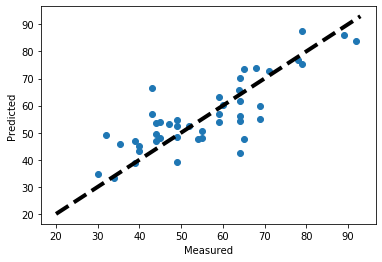

In [626]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

**<font color='teal'> The intercept is the mean `AdultWeekend` price for all the resorts given the other characteristics. The addition or subtraction of each of the coefficient values in the regression are numeric adjustments applied to the intercept to provide a particular observation's value for the resulting `AdultWeekend` value. Also, because we took the time to scale our x values in the training data, we can compare each of the coeeficients for the features to determine the feature importances. Print the coefficient values from the linear model and sort in descending order to identify the top ten most important features.</font>** 


Hint: make sure to review the absolute value of the coefficients, because the adjustment may be positive or negative, but what we are looking for is the magnitude of impact on our response variable.

In [627]:
# You might want to make a pandas DataFrame displaying the coefficients for each state like so: 
pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient']).sort_values(['Coefficient'], ascending = False)

,Coefficient
fastSixes,6.204294e+12
trams,5.114687e+12
fastEight,4.159334e+12
state_New York,2.270517e+12
state_Michigan,1.996813e+12
total_chairs,1.918099e+12
state_California,1.802167e+12
state_Pennsylvania,1.802167e+12
state_New Hampshire,1.730571e+12
state_Wisconsin,1.730571e+12


**<font color='teal'>You should see that the top ten important features are different states. However, the state is not something the managers at the Big Mountain Resort can do anything about. Given that we care more about actionable traits associated with ticket pricing, rebuild the model without the state features and compare the results. </font>**

Hint: Try to construct another model using exactly the steps we followed above. 

#### Model 2

In [628]:
df.columns

Index(['state', 'summit_elev', 'vertical_drop', 'trams', 'fastEight',
       'fastSixes', 'fastQuads', 'quad', 'triple', 'double', 'surface',
       'total_chairs', 'Runs', 'LongestRun_mi', 'SkiableTerrain_ac',
       'daysOpenLastYear', 'yearsOpen', 'averageSnowfall', 'AdultWeekday',
       'AdultWeekend', 'projectedDaysOpen', 'clusters'],
      dtype='object')

In [629]:
df3 = df.drop(['state'], axis =1)

In [630]:
df3.columns

Index(['summit_elev', 'vertical_drop', 'trams', 'fastEight', 'fastSixes',
       'fastQuads', 'quad', 'triple', 'double', 'surface', 'total_chairs',
       'Runs', 'LongestRun_mi', 'SkiableTerrain_ac', 'daysOpenLastYear',
       'yearsOpen', 'averageSnowfall', 'AdultWeekday', 'AdultWeekend',
       'projectedDaysOpen', 'clusters'],
      dtype='object')

In [631]:
X = df3.drop(columns = ['AdultWeekend'])
df3.head()

y = df3.AdultWeekend


scaler = preprocessing.StandardScaler().fit(X)


X_scaled=scaler.transform(X) 

In [632]:
y= df3['AdultWeekend'] 
results=smf.ols('y ~ X', data=df3).fit()
results.params

Intercept    1.951302e+01
X[0]         2.664354e-04
X[1]         3.514438e-03
X[2]        -4.404599e-13
X[3]        -1.586051e-12
X[4]        -4.980808e-14
X[5]         2.836886e-01
X[6]         8.171089e-01
X[7]         6.914239e-01
X[8]         1.363247e-01
X[9]        -1.052787e+00
X[10]        8.757590e-01
X[11]        1.189226e-02
X[12]        5.561506e-01
X[13]       -3.208437e-03
X[14]        8.258753e-02
X[15]        3.052015e-02
X[16]       -1.219178e-02
X[17]        6.348750e-01
X[18]       -4.549616e-02
X[19]       -5.193487e+00
dtype: float64

In [633]:
scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
print(scaler.fit(X))
X_scaled=scaler.transform(X)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [634]:
y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [635]:
X.head()

,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,LongestRun_mi,SkiableTerrain_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,projectedDaysOpen,clusters
1,2600,1540,0,0.0,0,0,0,0,4,0,4,36.0,2.0,640.0,45.0,44.0,350.0,47.0,90.0,0
2,2090,294,0,0.0,0,0,0,1,0,2,3,13.0,1.0,30.0,150.0,36.0,69.0,30.0,152.0,1
4,11100,1800,0,0.0,0,1,2,3,1,0,7,65.0,1.2,800.0,115.0,49.0,250.0,74.0,104.0,2
5,7800,600,0,0.0,0,0,0,1,3,1,5,10.0,0.4,88.0,110.0,84.0,300.0,47.0,107.0,2
8,7700,500,0,0.0,0,1,1,3,1,2,8,33.0,1.0,380.0,150.0,54.0,400.0,49.0,150.0,2


In [636]:
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [637]:
y_pred = lm.predict(X_test)

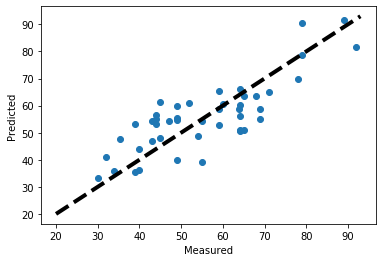

In [638]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [639]:
explained_variance_score(y_test, y_pred) 

0.6588119817948563

In [640]:
mean_absolute_error(y_test, y_pred)

7.3563399381875705

In [641]:
pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred}).head(20)

,y_test,y_pred
0,59.00000,52.892268
1,59.00000,58.575992
2,69.00000,54.886936
3,68.00000,63.394617
4,52.00000,60.899952
5,64.16681,60.238048
6,35.34000,47.486085
7,65.00000,63.535989
8,45.00000,48.159441
9,39.00000,53.102957


In [642]:
pd.DataFrame(abs(lm.coef_), X.columns, columns=['Coefficient']).sort_values(['Coefficient'], ascending = False)

,Coefficient
AdultWeekday,9.889722e+00
clusters,4.459418e+00
daysOpenLastYear,2.545686e+00
averageSnowfall,2.367373e+00
vertical_drop,2.283826e+00
summit_elev,1.889425e+00
triple,1.718365e+00
projectedDaysOpen,1.435067e+00
total_chairs,1.247566e+00
double,1.144592e+00


In [643]:
y_pred

array([52.892268  , 58.57599196, 54.88693598, 63.39461741, 60.89995205,
       60.23804771, 47.48608479, 63.53598944, 48.15944082, 53.10295732,
       33.42957212, 48.86330212, 66.07471036, 43.87616639, 50.72566023,
       54.99513032, 58.65735871, 54.37919828, 51.16350944, 56.44611473,
       54.2820607 , 40.86936756, 51.13310638, 60.74419881, 59.67103806,
       39.32053119, 56.13761409, 53.26864917, 65.5404068 , 54.47545569,
       64.94828997, 55.41363501, 35.84679204, 78.83290638, 69.80392998,
       40.00486356, 90.63215347, 36.25578732, 81.82288843, 35.46763593,
       54.86515193, 91.67729423, 61.16512874, 58.75830865, 46.944662  ])

**<font color='teal'> When reviewing our new model coefficients, we see `summit_elev` is now in the number two spot. This is also difficult to change from a management prespective and highly correlated with `base_elev` and `vertical_drop`.  This time, rebuild the model without the state features and without the `summit_elev` and without `base_elev`and compare the results. </font>**

#### Model 3

In [644]:
df3.columns

Index(['summit_elev', 'vertical_drop', 'trams', 'fastEight', 'fastSixes',
       'fastQuads', 'quad', 'triple', 'double', 'surface', 'total_chairs',
       'Runs', 'LongestRun_mi', 'SkiableTerrain_ac', 'daysOpenLastYear',
       'yearsOpen', 'averageSnowfall', 'AdultWeekday', 'AdultWeekend',
       'projectedDaysOpen', 'clusters'],
      dtype='object')

In [645]:
df4 = df3.drop(columns = ['summit_elev', 'vertical_drop'], axis =1 )

In [646]:
df4.columns

Index(['trams', 'fastEight', 'fastSixes', 'fastQuads', 'quad', 'triple',
       'double', 'surface', 'total_chairs', 'Runs', 'LongestRun_mi',
       'SkiableTerrain_ac', 'daysOpenLastYear', 'yearsOpen', 'averageSnowfall',
       'AdultWeekday', 'AdultWeekend', 'projectedDaysOpen', 'clusters'],
      dtype='object')

In [647]:
X = df4.drop(columns = ['AdultWeekend'])
df3.head()

y = df4.AdultWeekend


scaler = preprocessing.StandardScaler().fit(X)


X_scaled=scaler.transform(X) 

In [648]:
y= df4['AdultWeekend'] 
results=smf.ols('y ~ X', data=df4).fit()
results.params

Intercept    1.916990e+01
X[0]         3.220044e-13
X[1]        -1.841445e-13
X[2]         2.244506e-13
X[3]         7.096248e-01
X[4]         7.410393e-01
X[5]         7.106456e-01
X[6]        -2.312508e-03
X[7]        -1.285871e+00
X[8]         8.731263e-01
X[9]         4.564510e-02
X[10]        9.629486e-01
X[11]       -7.552386e-04
X[12]        7.728924e-02
X[13]        4.087124e-02
X[14]       -6.858598e-03
X[15]        6.653065e-01
X[16]       -4.287391e-02
X[17]       -4.981177e+00
dtype: float64

In [649]:
scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
print(scaler.fit(X))
X_scaled=scaler.transform(X)

StandardScaler(copy=True, with_mean=True, with_std=True)


In [650]:
y = y.ravel()
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=1)

In [600]:
X.head()

,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,Runs,LongestRun_mi,SkiableTerrain_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,projectedDaysOpen,clusters
1,0,0.0,0,0,0,0,4,0,4,36.0,2.0,640.0,45.0,44.0,350.0,47.0,90.0,0
2,0,0.0,0,0,0,1,0,2,3,13.0,1.0,30.0,150.0,36.0,69.0,30.0,152.0,1
4,0,0.0,0,1,2,3,1,0,7,65.0,1.2,800.0,115.0,49.0,250.0,74.0,104.0,2
5,0,0.0,0,0,0,1,3,1,5,10.0,0.4,88.0,110.0,84.0,300.0,47.0,107.0,2
8,0,0.0,0,1,1,3,1,2,8,33.0,1.0,380.0,150.0,54.0,400.0,49.0,150.0,2


In [651]:
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [652]:
y_pred = lm.predict(X_test)

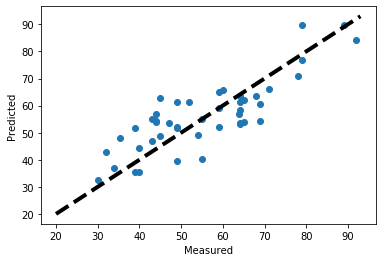

In [653]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [655]:
mean_absolute_error(y_test, y_pred)

7.12155851354296

In [656]:
explained_variance_score(y_test, y_pred) 

0.6809235292985945

In [654]:
pd.DataFrame({'y_test' : y_test, 'y_pred' : y_pred}).head(20)

,y_test,y_pred
0,59.00000,52.252492
1,59.00000,59.099829
2,69.00000,54.392546
3,68.00000,63.417156
4,52.00000,61.175268
5,64.16681,63.500365
6,35.34000,48.106220
7,65.00000,61.929989
8,45.00000,48.697307
9,39.00000,51.894424


## Identify the Final Model

**<font color='teal'> Review the model performances in the table below and choose the best model for proving insights to Big Mountain management about what features are driving ski resort lift ticket prices. Type your choice in the final markdown cell — you will discuss this selection more in the next step of the guided casptone. </font>**

| Model | Explained Variance| Mean Absolute Error|Features Dropped|
| --- | --- | --- | --- |
| Model 1. | 0. |  |-|
| Model 2. | 0.| |'state'|
| Model 3. | 0. | |'state','summit_elev','base_elev'|

Model Selection:

Comparing the 3 models, the third model which drops 'state', 'summit_elev', 'base_elev' yields the highest Explained Variance and reasonable Mean Absolute Error